<a href="https://colab.research.google.com/github/GoldFiiish/medical-data/blob/master/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf


from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model


In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)



4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [ ]:
kk = x_train.copy()
hh = x_test.copy()
for i in range(60000):
  kk[i][0:29,0:29] = 0
for i in range(10000):
  hh[i][0:29,0:29] = 0

In [ ]:
#plt.imshow(kk[12125])
print (hh.shape)


(10000, 28, 28)


In [ ]:
print(x_train[1])

In [ ]:
print(x_train[4][10,10])

(60000, 28, 28)


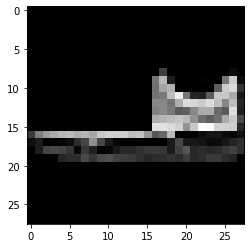

In [ ]:
print (kk.shape)
plt.imshow(hh[9])

In [ ]:
#print(x_train[1][:5][:5])
kk = x_train.copy()
#print("------------------------------------")
#print(kk)
#plt.imshow(x_train[1][:29][:28])
kk[1][12:16,12:17] = 0
#print(kk) 
plt.imshow(kk[1])

In [ ]:
plt.imshow(kk[0])

In [ ]:
latent_dim = 64 

class Autoencoder(Model):
  def __init__(self, encoding_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense((latent_dim*4), activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(3136, activation='sigmoid'),
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded
  
autoencoder = Autoencoder(latent_dim) 

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())


In [ ]:
autoencoder.fit(kk, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(hh, x_test))


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0054 - val_loss: 0.0062
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0052 - val_loss: 0.0060
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0051 - val_loss: 0.0060
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0049 - val_loss: 0.0060
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0048 - val_loss: 0.0059
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0047 - val_loss: 0.0060
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0047 - val_loss: 0.0060
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0045 - val_loss: 0.0061
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0045 - val_loss: 0.0060
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.004

In [ ]:
autoencoder.fit(kk, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(hh, x_test))


Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0063 - val_loss: 0.0065
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0062 - val_loss: 0.0064
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0062 - val_loss: 0.0065
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0061 - val_loss: 0.0064
Epoch 5/10
1837/1875 [============================>.] - ETA: 0s - loss: 0.0061

KeyboardInterrupt: ignored

In [ ]:
encoded_imgs = autoencoder.encoder(hh).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()


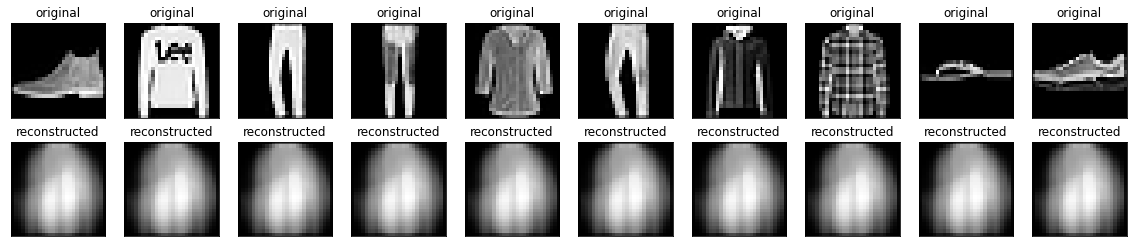

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()
